In [29]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [2]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new']

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']

filenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new']'''

magnitudes = np.arange(3,8, 0.1)

In [4]:
def sort_tp_data(df, mag_lim = 0):
    list_tp_all = list(df.tp_max)
    list_mag_all = list(df.eq_mag)
    list_mag = []
    list_tpmax = []
    count = 0
    for m in range(0, len(list_mag_all)):
        if list_mag_all[m] > mag_lim:
            list_mag.append(list_mag_all[m])
            list_tpmax.append([])
            for d in range(0, len(list_tp_all[m])):
                if list_tp_all[m][d] != None and list_tp_all[m][d]>0:
                    list_tpmax[count].append(list_tp_all[m][d])
            count += 1
    return list_mag, list_tpmax

In [5]:
gradt, intercept, gradt_std, intercept_std = [],[],[],[]
pearson = []
spearman = []
spearman_p = []

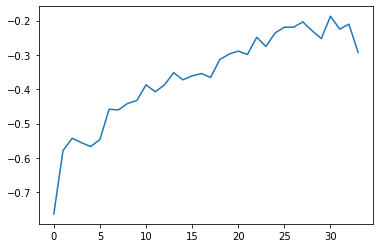

In [94]:
plt.plot(a * (np.log(x)/ np.log(b)) + c)
func(median, popt.x[0] , (popt.x[1]),popt.x[2]))


In [33]:
def func(x, a, b, c):
    return a * (np.log(x)/ np.log(b)) + c

In [60]:
def func_power(x, a, b, c):
    return a * (x ** (1/b)) + c 

In [86]:
def func_min(init_guess, arguments):
    a,b,c = init_guess
    y,x = arguments
    return sum(((a * (np.log(x)/ np.log(b)) + c)-y)**2)

eq_object_05s_bandpass_01_19_snr_20_blank_0_new
7


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3667123/2998319918.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs.scatter(bin_edges[:-1]+0.05, median-2, marker = 'x', color = '#7f58af', zorder = 1000, edgecolor = 'black')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


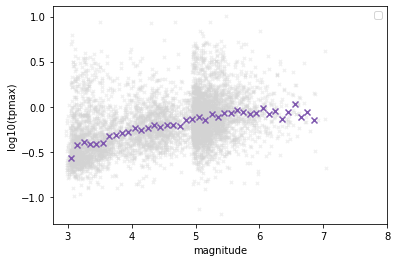

In [173]:
for f in filenames[1:2]:
    print(f)
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    #for mag_lim in [7]:#magnitudes:
    print(mag_lim)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    list_mags, list_tpmax = sort_tp_data(df, 3)
    #print(len(list_mags), len(list_tpmax))
    params = []
    opacities = np.linspace(0.2,1,45)
    cs = ['midnightblue']
    #fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    y_aves_tp = []
    x_aves_tp = []
    count = 1
    eq_count = 0
    medians = [[] for _ in range(0, 45)]
    medians_of_medians = [[] for _ in range(0, 45)]
    n = 0
    median_absolute_deviation = []
    sum_absolute_deviation = []
    all_abs_deviation = []
    for n in [1]:#number of stations eq at least measured at
        fig, axs = plt.subplots(1,1)#, figsize=(12.8,9.6))
        med_for_ad = []
        mag_for_ad = []

        y_aves_tp = []
        x_aves_tp = []
        for i  in range(0, len(list_mags)):
            if list_mags[i] >= 3 and list_mags[i]<=mag_lim:
                #print('in if')
                if len(list_tpmax[i])>=n:
                    mean_tp = np.mean(list_tpmax[i]) 
                    std_tp = np.std(list_tpmax[i]) 
                    y_tp = [] 
                    for j in list_tpmax[i]: 
                        if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                            y_tp.append(math.log(j, 10))
                        elif len(list_tpmax[i])==1:
                            y_tp.append(math.log(j, 10))
                    x_tp = np.zeros(len(y_tp))  
                    x_tp = x_tp + list_mags[i]
                    c = 0
                    #if len(x_tp)>0:
                        #if math.isnan(np.median(y_tp))==False:
                            #axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tp)+2, s = 10, c = '#003f5c', marker = 'x', zorder =110, alpha = 0.5)
                    if math.isnan(np.median(y_tp))==False:  
                        y_aves_tp.append(np.median(y_tp))
                        x_aves_tp.append(list_mags[i])
        if len(y_aves_tp)>0:
            x_use = np.array(x_aves_tp) - 5
            y_use = np.array(y_aves_tp)

            #print(len(x_aves_tp), len(y_aves_tp))
            count += 1
            x = x_use
            y = y_use
            x_unique = np.arange(min(x_use),max(x_use),0.1)
            df_tp = pd.DataFrame(columns = x_unique)
            median, bin_edges, bin_number = scipy.stats.binned_statistic(x, y+2, statistic='median', bins=np.arange(-2,2,0.1), range=None)
            bin_centers = bin_edges[:-1] + 0.05+5
            median = median 
            if len(set(x))>1:
                #fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
                axs.scatter(bin_edges[:-1]+0.05, median-2, marker = 'x', color = '#7f58af', zorder = 1000, edgecolor = 'black')
                #popt = scipy.optimize.curve_fit(func, bin_centers, y+1, p0 = (1,20,0),maxfev= 10000)
                #axs.scatter(x,y+1)
                #print('curvefit')
                #print(popt)
                #axs.plot(y-5, func(x, popt[0][0],popt[0][1],popt[0][2]))
                #popt = scipy.optimize.curve_fit(func_power, bin_centers, median, p0 = (1,1,1),maxfev = 10000)
                axs.scatter(x+np.random.uniform(-0.05, 0.05, len(x)), y, s = 10, c = 'lightgrey', marker = 'x', zorder =110, alpha = 0.3)
                #popt = scipy.optimize.curve_fit(func, bin_centers, median, p0 = (1,100,1),maxfev= 10000)
                #axs.plot(bin_centers, func(bin_centers, popt[0][0] , popt[0][1],popt[0][2]))
                #print(popt)
                #popt = scipy.optimize.minimize(func_min, x0 = [1.2,10,1], args = [median, bin_centers],options= {'maxiter':10000})
                #axs.plot(bin_centers-5, func(bin_centers, popt.x[0] , (popt.x[1]),popt.x[2])-2, color = 'orange', linewidth=3, zorder = 10000)
                #print(popt)#print('minimize')
                #popt = scipy.optimize.minimize(func_min, x0 = [1.2,10,1], args = [y+2, x],options= {'maxiter':10000})
                #print(popt)
                #axs.plot(x, func(x, popt.x[0] , (popt.x[1]),popt.x[2]))
                axs.set_ylabel('log10(tpmax)')
                axs.set_xlabel('magnitude')   
                axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
        
                axs.legend() 
                #plt.show()

    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/all_data/tpmax/purple_lightgrey_no_line_{f}.pdf', dpi=400)

In [127]:
len(y)

array([1.4336894 , 1.57539557, 1.60458765, 1.58890133, 1.58198064,
       1.59981045, 1.67771411, 1.68140645, 1.70637119, 1.71545676,
       1.76608736, 1.74265621, 1.76305161, 1.7988965 , 1.77845987,
       1.79231724, 1.80051746, 1.78268299, 1.85545428, 1.85990152,
       1.8810064 , 1.85109381, 1.91660787, 1.88144703, 1.93295659,
       1.93054013, 1.95858177, 1.94662232, 1.91570153, 1.92767263,
       1.98694156, 1.91482732, 1.94949436, 1.86317382, 1.94530088,
       2.02707371, 1.8833893 , 1.93955178, 1.85552706])

In [98]:
popt

array([ 0.01162647,  0.41162647,  0.01162647, ..., -1.78837353,
       -0.08837353, -0.28837353])

eq_object_05s_bandpass_01_19_snr_20_blank_0_new
7


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


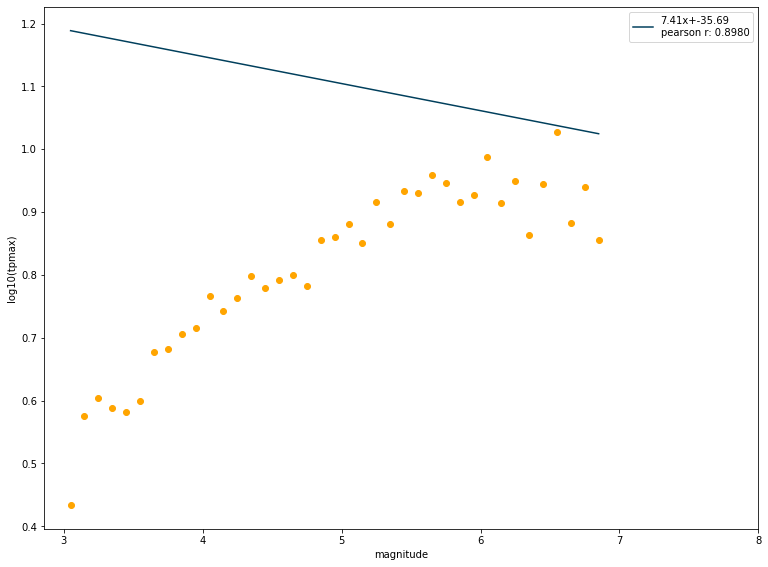

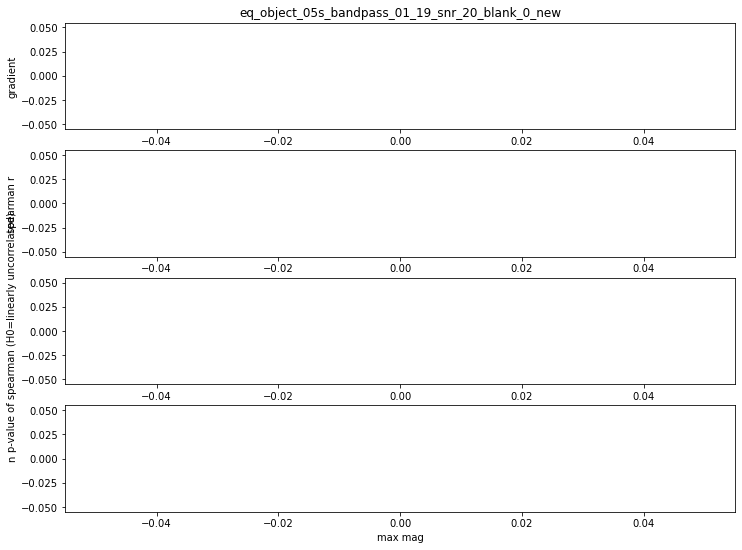

In [28]:
for f in filenames[1:2]:
    print(f)
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    mag_lim = 7 #for mag_lim in [7]:#magnitudes:
    print(mag_lim)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    list_mags, list_tpmax = sort_tp_data(df, 3)
    #print(len(list_mags), len(list_tpmax))
    params = []
    opacities = np.linspace(0.2,1,45)
    cs = ['midnightblue']
    #fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    y_aves_tp = []
    x_aves_tp = []
    count = 1
    eq_count = 0
    medians = [[] for _ in range(0, 45)]
    medians_of_medians = [[] for _ in range(0, 45)]
    n = 0
    median_absolute_deviation = []
    sum_absolute_deviation = []
    all_abs_deviation = []
    for n in [1]:#number of stations eq at least measured at
        med_for_ad = []
        mag_for_ad = []

        y_aves_tp = []
        x_aves_tp = []
        for i  in range(0, len(list_mags)):
            if list_mags[i] >= 3 and list_mags[i]<=mag_lim:
                #print('in if')
                if len(list_tpmax[i])>=n:
                    mean_tp = np.mean(list_tpmax[i]) 
                    std_tp = np.std(list_tpmax[i]) 
                    y_tp = [] 
                    for j in list_tpmax[i]: 
                        if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                            y_tp.append(math.log(j, 10))
                        elif len(list_tpmax[i])==1:
                            y_tp.append(math.log(j, 10))
                    x_tp = np.zeros(len(y_tp))  
                    x_tp = x_tp + list_mags[i]
                    c = 0
                    #if len(x_tp)>0:
                        #if math.isnan(np.median(y_tp))==False:
                            #axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 10, c = '#003f5c', marker = 'x', zorder =110, alpha = 0.5)
                    if math.isnan(np.median(y_tp))==False:  
                        y_aves_tp.append(np.median(y_tp))
                        x_aves_tp.append(list_mags[i])
        if len(y_aves_tp)>0:
            x_use = np.array(x_aves_tp) - 5
            y_use = np.array(y_aves_tp)

            #print(len(x_aves_tp), len(y_aves_tp))
            count += 1
            x = x_use
            y = y_use
            x_unique = np.arange(min(x_use),max(x_use),0.1)
            df_tp = pd.DataFrame(columns = x_unique)
            median, bin_edges, bin_number = scipy.stats.binned_statistic(x, y, statistic='median', bins=np.arange(-2,2,0.1), range=None)
            bin_centers = bin_edges[:-1] + 0.05
            if len(set(x))>1:
                result = scipy.stats.linregress(median,bin_centers)
                a = result.slope
                b = result.intercept
     
                fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
                #plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
                axs.scatter(bin_edges[:-1]+0.05, median+1, marker = 'o', color = 'orange', zorder = 1000)
                #axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
                #axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
                popt = np.polyfit(bin_centers, median, 2)
                axs.plot(bin_centers, popt[0]*bin_centers+popt[1]+1, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
                axs.set_ylabel('log10(tpmax)')
                axs.set_xlabel('magnitude')   
                axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
        
                axs.legend() 
                plt.show()
    fig, axs = plt.subplots(4,1, figsize = (12,9))
    axs[0].plot(magnitudes[0:len(spearman)],gradt)
    axs[0].set_ylabel('gradient')
    axs[1].plot(magnitudes[0:len(spearman)],spearman)
    axs[1].set_ylabel('spearman r')
    axs[2].plot(magnitudes[0:len(spearman)],spearman_p)
    axs[2].set_ylabel('p-value of spearman (H0=linearly uncorrelated)')
    axs[3].plot(magnitudes[0:len(spearman)],n_l)
    axs[3].set_ylabel('n')
    axs[0].set_title(f)
    axs[3].set_xlabel('max mag')
    #plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/gradt_spearman/with_number_{f}.pdf', dpi=400)

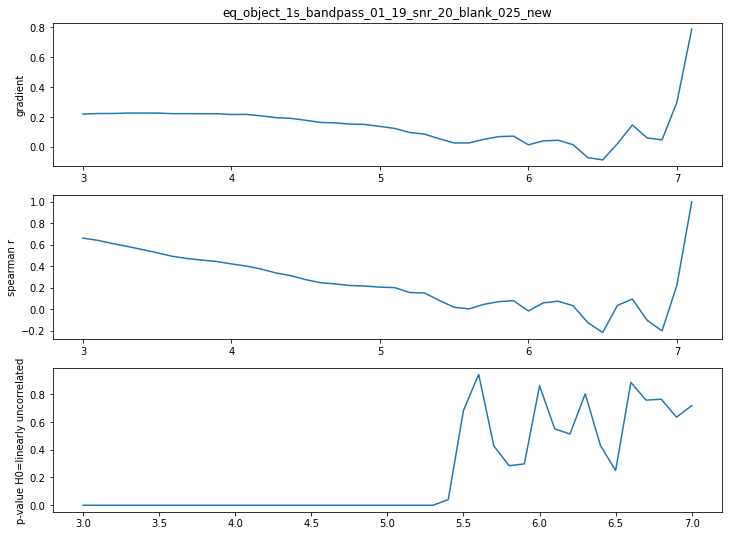

In [25]:
fig, axs = plt.subplots(3,1, figsize = (12,9))
axs[0].plot(magnitudes[0:47],gradt)
axs[0].set_ylabel('gradient')
axs[1].plot(magnitudes[0:47],spearman)
axs[1].set_ylabel('spearman r')
axs[2].plot(magnitudes[0:47],spearman_p)
axs[2].set_ylabel('p-value H0=linearly uncorrelated')
axs[0].set_title(f)
plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/gradt_spearman/{f}.pdf', dpi=400)

In [44]:
list_mags

[7.8, 7.8]